In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
df_edges = pd.DataFrame({
    'source': ['수학', '수학', '수학', '수학', '수학_1', '수학_1', '수학_1', '수학_1', '미적분', '수학_2', '수학_2', '심화수학_1', '심화수학_2', '심화수학_1'],
    'target': ['심화수학_2', '수학_1', '수학_2', '심화수학_1', '경제수학', '미적분', '대수', '해석', '해석', '해석', '심화수학_1', '해석', '해석', '심화수학_2'],
    'links': [3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3]})
df_edges

,source,target,links
0,수학,심화수학_2,3
1,수학,수학_1,3
2,수학,수학_2,3
3,수학,심화수학_1,3
4,수학_1,경제수학,3
5,수학_1,미적분,3
6,수학_1,대수,1
7,수학_1,해석,1
8,미적분,해석,1
9,수학_2,해석,1


In [3]:
df_nodes = pd.DataFrame({
    'name': ['수학', '수학_1', '수학_2', '미적분', '심화수학_1', '심화수학_2', '경제수학', '대수', '해석'],
    'category': ['subject', 'subject', 'subject', 'subject', 'subject', 'subject', 'subject', 'category', 'category']
})
df_nodes

,name,category
0,수학,subject
1,수학_1,subject
2,수학_2,subject
3,미적분,subject
4,심화수학_1,subject
5,심화수학_2,subject
6,경제수학,subject
7,대수,category
8,해석,category


In [4]:
node_colors = {'subject': 'lightsteelblue', 'category': 'lightcoral'}
df_nodes['node_color'] = df_nodes['category'].map(node_colors)
node_size = {}
for node in df_nodes['name']:
  freq = (list(df_edges['source']).count(node)+list(df_edges['target']).count(node))*200
  node_size[node] = freq
df_nodes['node_size'] = df_nodes['name'].map(node_size)
df_nodes

,name,category,node_color,node_size
0,수학,subject,lightsteelblue,800
1,수학_1,subject,lightsteelblue,1000
2,수학_2,subject,lightsteelblue,600
3,미적분,subject,lightsteelblue,400
4,심화수학_1,subject,lightsteelblue,800
5,심화수학_2,subject,lightsteelblue,600
6,경제수학,subject,lightsteelblue,200
7,대수,category,lightcoral,200
8,해석,category,lightcoral,1000


In [5]:
g = nx.from_pandas_edgelist(df_edges, source = 'source', target = 'target', edge_attr = 'links')
nodes_attr = df_nodes.set_index('name').to_dict(orient = 'index')
nx.set_node_attributes(g, nodes_attr)

In [6]:
print(g.nodes)
for n in g.nodes:
  print(g.nodes[n])

['수학', '심화수학_2', '수학_1', '수학_2', '심화수학_1', '경제수학', '미적분', '대수', '해석']
{'category': 'subject', 'node_color': 'lightsteelblue', 'node_size': 800}
{'category': 'subject', 'node_color': 'lightsteelblue', 'node_size': 600}
{'category': 'subject', 'node_color': 'lightsteelblue', 'node_size': 1000}
{'category': 'subject', 'node_color': 'lightsteelblue', 'node_size': 600}
{'category': 'subject', 'node_color': 'lightsteelblue', 'node_size': 800}
{'category': 'subject', 'node_color': 'lightsteelblue', 'node_size': 200}
{'category': 'subject', 'node_color': 'lightsteelblue', 'node_size': 400}
{'category': 'category', 'node_color': 'lightcoral', 'node_size': 200}
{'category': 'category', 'node_color': 'lightcoral', 'node_size': 1000}


[]

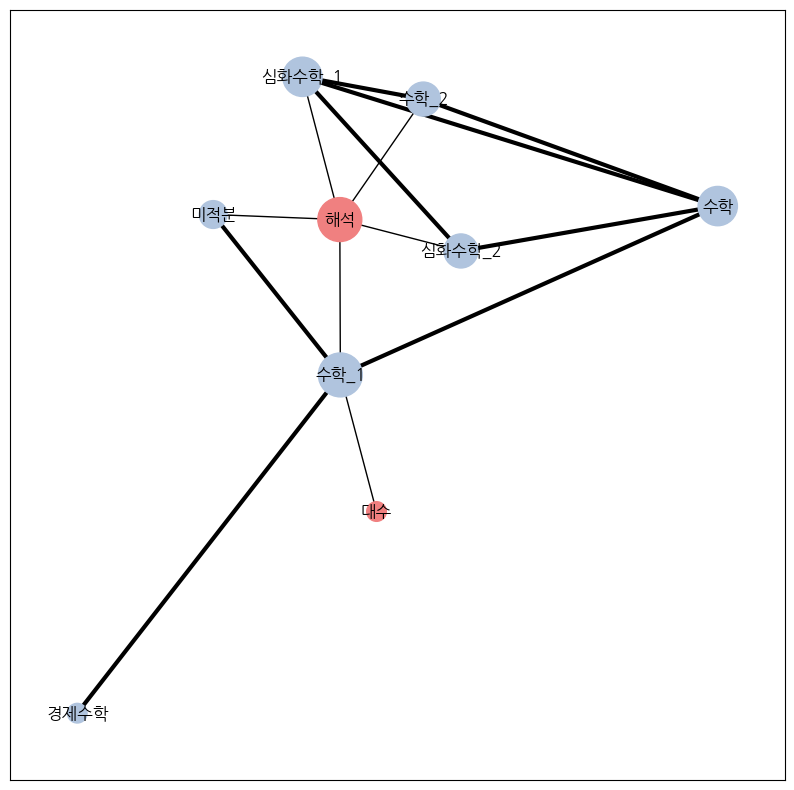

In [7]:
plt.figure(figsize=(10,10)) 
nx.draw_networkx(g, 
    pos = nx.kamada_kawai_layout(g, weight = 'links'), 
    node_size = [g.nodes[n]['node_size'] for n in g.nodes], 
    node_color = [g.nodes[n]['node_color'] for n in g.nodes],
    width = [g.edges[e]['links'] for e in g.edges],
    with_labels = True, 
    font_family = 'NanumGothic')
plt.plot()

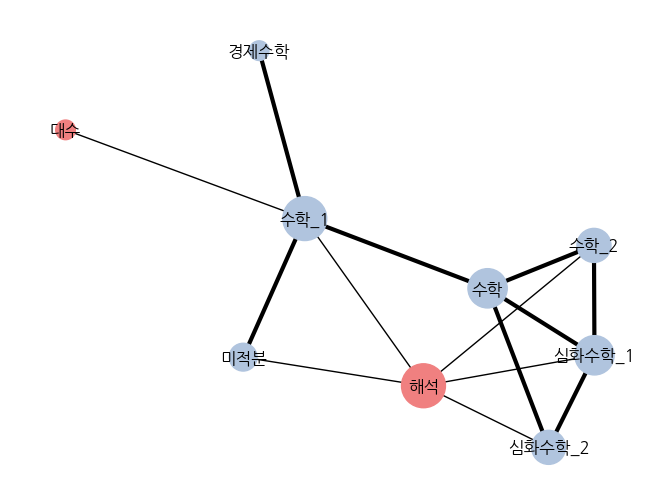

In [8]:
nx.draw(g, 
    pos = nx.spring_layout(g, weight = 'links'), 
    node_size = [g.nodes[n]['node_size'] for n in g.nodes], 
    node_color = [g.nodes[n]['node_color'] for n in g.nodes],
    width = [g.edges[e]['links'] for e in g.edges],
    with_labels = True,
    font_family = 'NanumGothic')

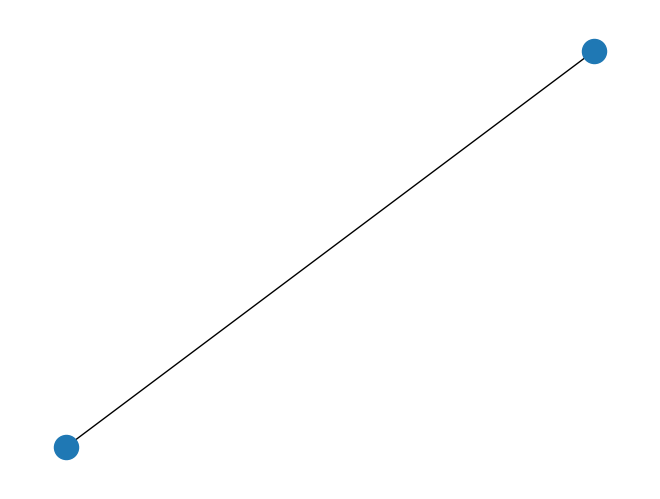

In [9]:
G = nx.Graph()
G.add_edge(1,2) 
nx.draw(G)

In [10]:
df = pd.read_csv('/home/seongyeub/2022/KT_Project/KT_Edu/job_map/data_analysis/job_data.csv')
df

,job,job_id,job_summary,preparation,required_certificates,major,major_code
0,"가구제조,수리원",159,"- 가구제조ㆍ수리원은 여러 형태의 가구를 가공, 제작하고, 가구의 파손된 부위를 수...","- 가구제조, 수리원이 되기 위해서는 학력에 제한은 없으나, 입직 후 입직 후 업무...","가구제작기능사, 목공예기능사",NaN,NaN
1,가구조립 및 검사원,1152,- 가구조립 및 검사원은 여러 형태의 가구를 조립하고 조립을 완성한 가구제품의 품질...,- 가구조립 및 검사원이 되기 위해서는 고등학교 졸업 이상의 학력이 요구된다.,"가구제작기능사, 목공예기능사",NaN,NaN
2,가사도우미,352,"- 가사도우미는 주부를 대신하여 집안 청소, 요리, 세탁, 다림질 등의 가사 노동을...",- 가사도우미가 되기 위해 요구되는 학력의 제한은 없다.,NaN,NaN,NaN
3,가상현실전문가,1093,- 가상현실전문가는 3차원모델링(3D) 및 가상현실모델링언어(VRML)등의 기술을 ...,"- 가상현실전문가가 되기 위해서는 전문대 및 대학교에서 전자공학과, 정보통신공학과,...","정보처리기사, 시각디자인산업기사, 시각디자인기사, 컴퓨터그래픽스운용기능사",컴퓨터공학과,569.0
4,가상현실전문가,1093,- 가상현실전문가는 3차원모델링(3D) 및 가상현실모델링언어(VRML)등의 기술을 ...,"- 가상현실전문가가 되기 위해서는 전문대 및 대학교에서 전자공학과, 정보통신공학과,...","정보처리기사, 시각디자인산업기사, 시각디자인기사, 컴퓨터그래픽스운용기능사",컴퓨터과학과,570.0
...,...,...,...,...,...,...,...
1697,IT컨설턴트,450,"- IT컨설턴트는 기업의 인적, 물적 자원 및 모든 조건에 관련된 자료를 수집·분석...","- IT컨설턴트가 되기 위해서는 대학이나 대학원, 전문대학에서 전자공학, 컴퓨터공학...","정보처리기능사, 정보처리산업기사, 정보처리기사, 정보관리기술사, 정보통신산업기사, ...",경영학과,23.0
1698,IT컨설턴트,450,"- IT컨설턴트는 기업의 인적, 물적 자원 및 모든 조건에 관련된 자료를 수집·분석...","- IT컨설턴트가 되기 위해서는 대학이나 대학원, 전문대학에서 전자공학, 컴퓨터공학...","정보처리기능사, 정보처리산업기사, 정보처리기사, 정보관리기술사, 정보통신산업기사, ...",스마트정보과,489.0
1699,IT컨설턴트,450,"- IT컨설턴트는 기업의 인적, 물적 자원 및 모든 조건에 관련된 자료를 수집·분석...","- IT컨설턴트가 되기 위해서는 대학이나 대학원, 전문대학에서 전자공학, 컴퓨터공학...","정보처리기능사, 정보처리산업기사, 정보처리기사, 정보관리기술사, 정보통신산업기사, ...",인터넷정보학과,486.0
1700,IT컨설턴트,450,"- IT컨설턴트는 기업의 인적, 물적 자원 및 모든 조건에 관련된 자료를 수집·분석...","- IT컨설턴트가 되기 위해서는 대학이나 대학원, 전문대학에서 전자공학, 컴퓨터공학...","정보처리기능사, 정보처리산업기사, 정보처리기사, 정보관리기술사, 정보통신산업기사, ...",정보통신공학과,490.0


In [11]:
df_job = df[['job', 'major']]
df_job = df_job[df_job['job']=='통계학연구원']
df_job

,job,major
1439,통계학연구원,수학과
1440,통계학연구원,통계학과


In [12]:
df_subjects = pd.read_csv('/home/seongyeub/2022/KT_Project/KT_Edu/job_map/data_analysis/major_subject.csv')
df_subjects = df_subjects.drop_duplicates()
df_subjects = df_subjects[df_subjects['major']=='수학과']
df_subjects

,major,subject_category,subject_details
689,수학과,공통과목,"수학, 사회, 정보, 과학"
690,수학과,일반선택과목,"수학교과 : 수학Ⅰ, 수학Ⅱ, 미적분, 확률과 통계, 사회교과 : 사회문화, 경제,..."
691,수학과,진로선택과목,"실용수학, 기하, 경제수학, 수학과제탐구, 물리학Ⅱ"
692,수학과,전문교과Ⅰ,"심화수학Ⅰ, 심화수학Ⅱ, 고급수학Ⅰ, 고급수학Ⅱ, 정보과학"
693,수학과,전문교과Ⅱ,정보처리와 관리


/home/seongyeub/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/seongyeub/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/seongyeub/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/seongyeub/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/seongyeub/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canva

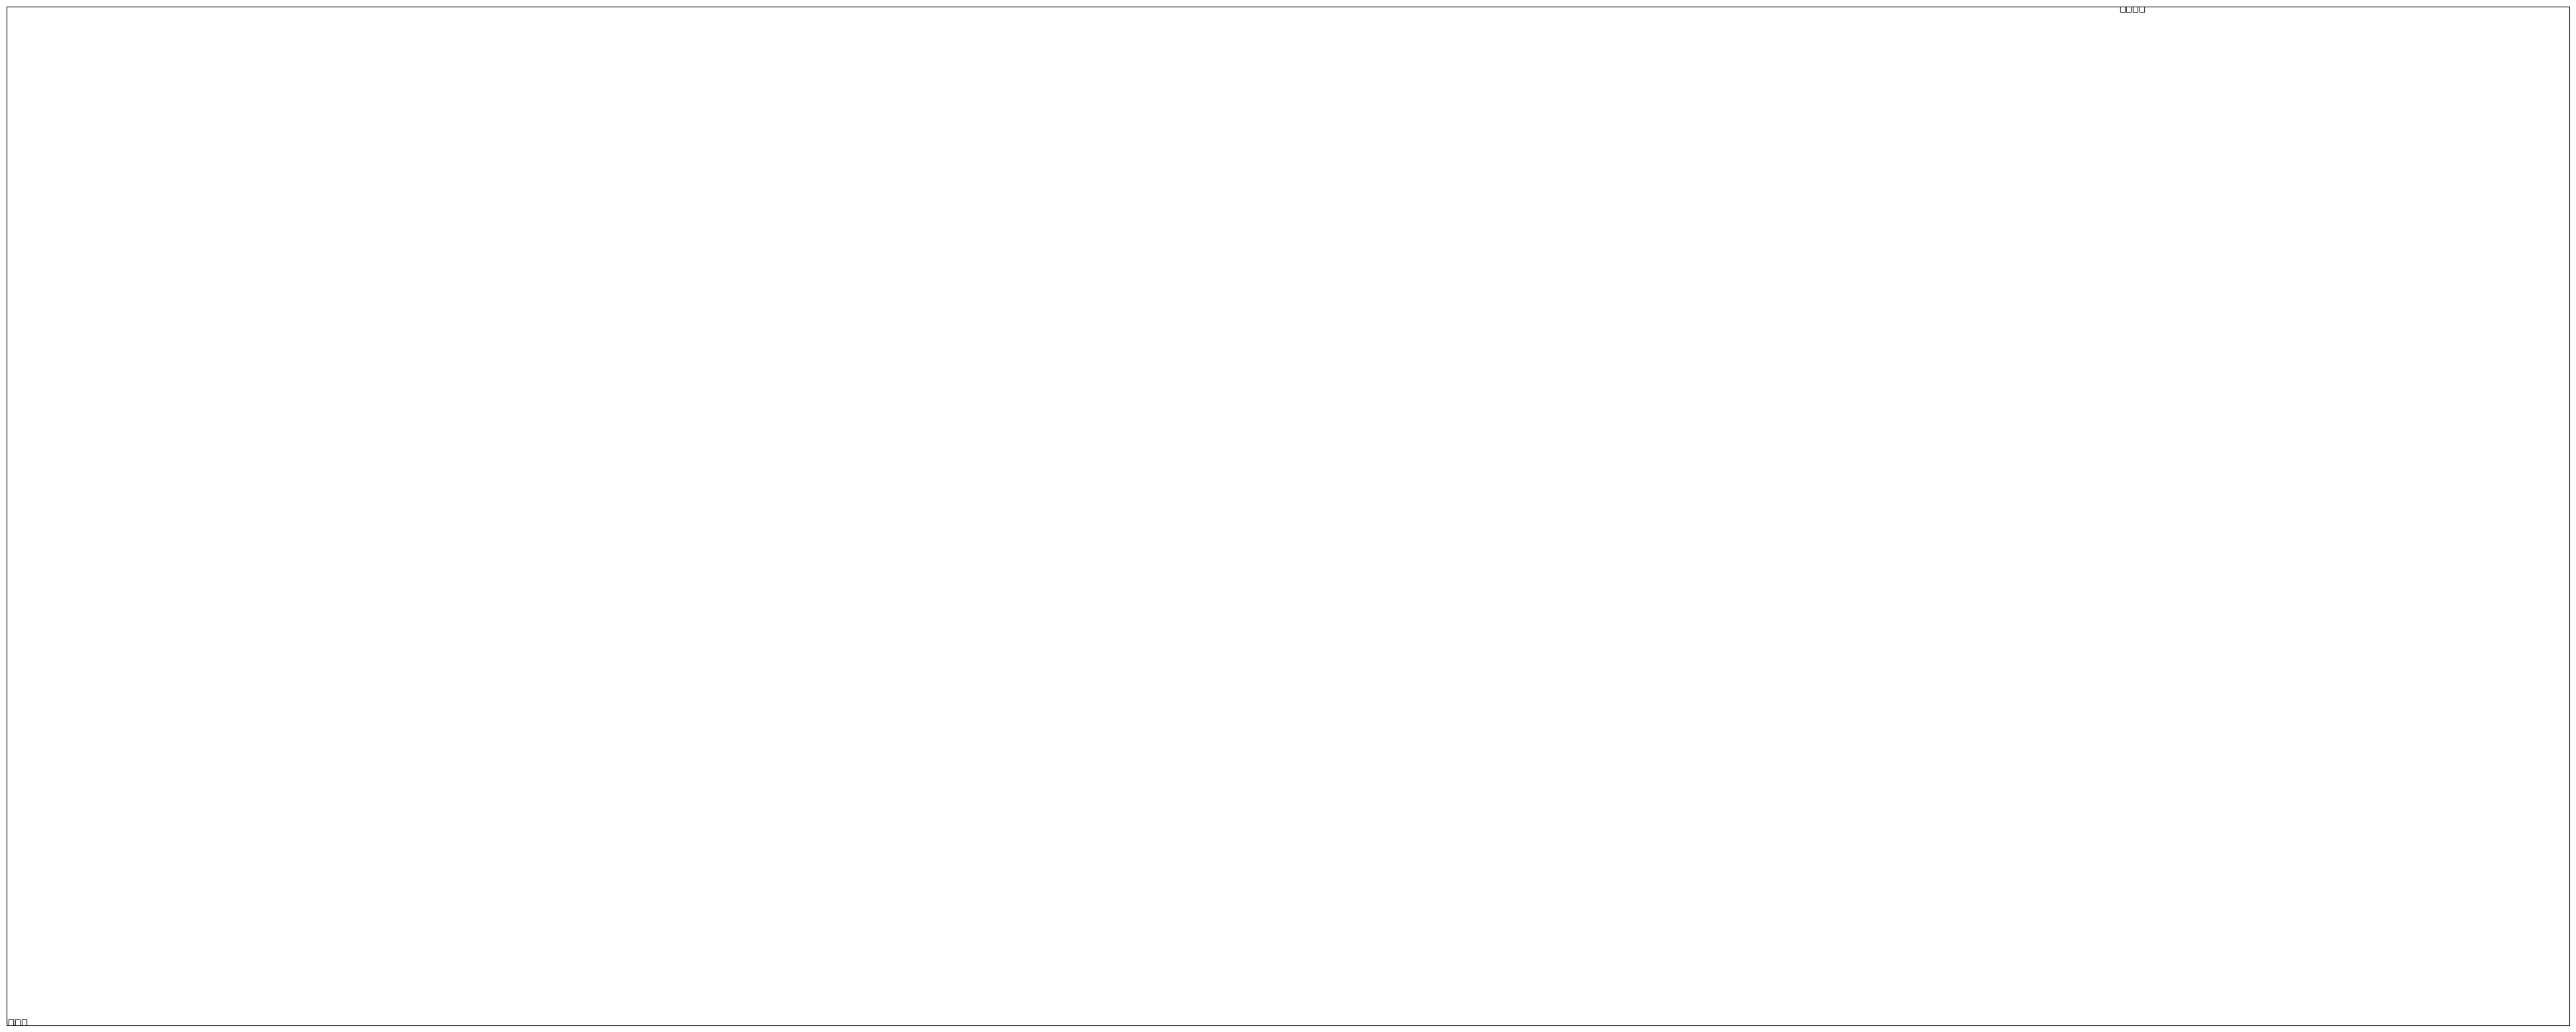

In [13]:
plt.figure(figsize=(50, 20))

# 1. Create the graph
g = nx.from_pandas_edgelist(df_job, source='job', target='major') 

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g)
nx.draw_networkx_labels(g, layout)
plt.show()